Take a quick look at gaps between observations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import lsst.sims.maf.db as db
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metrics as metrics
from lsst.sims.maf.metrics import BaseMetric

In [2]:
database = 'enigma_1189_sqlite.db'
opsdb = db.OpsimDatabase(database)
outDir = 'Gaps'
resultsDb = db.ResultsDb(outDir=outDir)

In [6]:
constraint_dict = {}
constraint_dict['anyFilter'] = ''
constraint_dict['blue'] = "filter='u' or filter='g'"
constraint_dict['red'] = "filter='r' or filter='i' or filter='z' or filter='y'"
constraint_dict['u'] = "filter='u'"
constraint_dict['g'] = "filter='g'"
bundleList = []
slicer = slicers.OpsimFieldSlicer()
metric = metrics.InterNightGapsMetric()

for key in constraint_dict.keys():
    bundle=metricBundles.MetricBundle(metric, slicer, constraint_dict[key])
    bundleList.append(bundle)


Querying database with no constraint.
Found 2469307 visits
Running:  ['opsim_Median_Inter-Night_Gap_OPSI']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database with constraint filter='u'
Found 186607 visits


Running:  ['opsim_Median_Inter-Night_Gap_u_OPSI']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database with constraint filter='r' or filter='i' or filter='z' or filter='y'
Found 2033592 visits
Running:  ['opsim_Median_Inter-Night_Gap_r_or_i_or_z_or_y_OPSI']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database with constraint filter='g'
Found 249108 visits
Running: 

 ['opsim_Median_Inter-Night_Gap_g_OPSI']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database with constraint filter='u' or filter='g'
Found 435715 visits
Running:  ['opsim_Median_Inter-Night_Gap_u_or_g_OPSI']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with  sqlconstraint now.
Plotting complete.

Optimal bin calculation tried to make 370 bins, returning 200



Plotting figures with filter='u' sqlconstraint now.
Plotting complete.
Plotting figures with filter='r' or filter='i' or filter='z' or filter='y' sqlconstraint now.
Plotting complete.
Plotting figures with filter='g' sqlconstraint now.
Plotting complete.
Plotting figures with filter='u' or filter='g' sqlconstraint now.
Plotting complete.


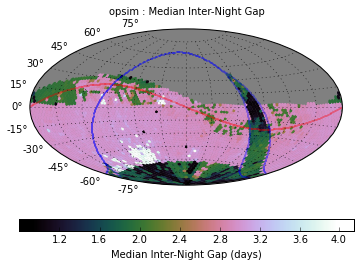

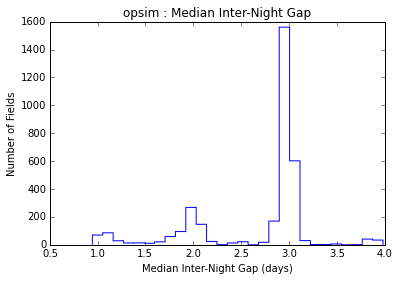

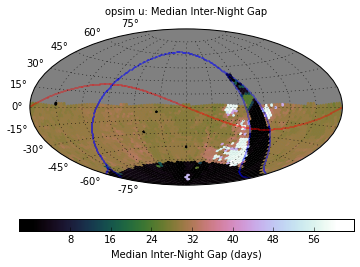

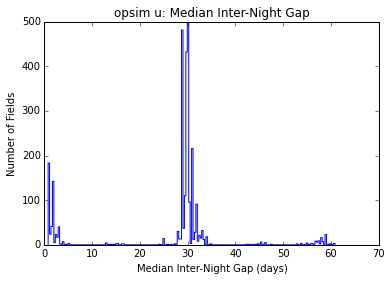

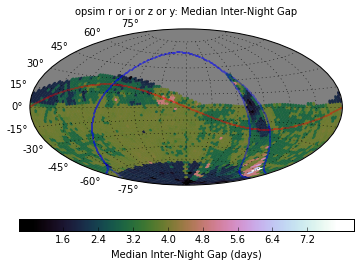

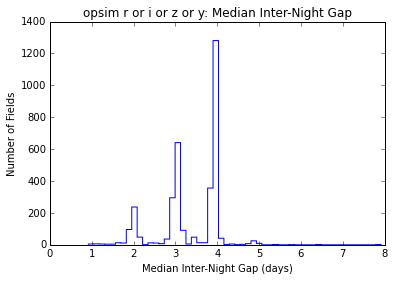

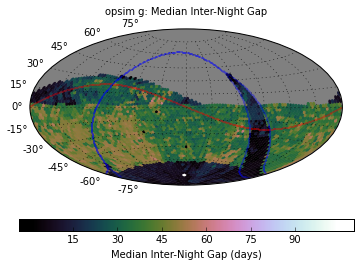

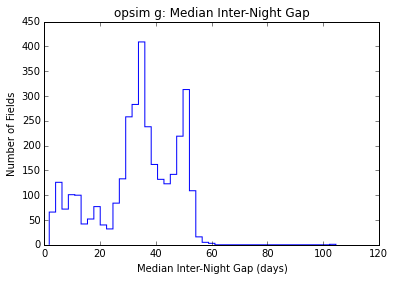

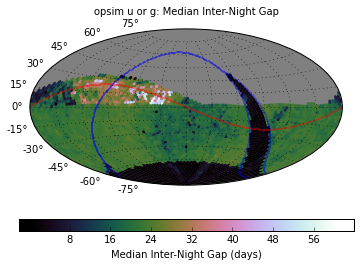

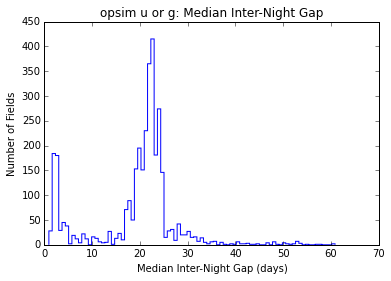

In [9]:
bdict = metricBundles.makeBundlesDictFromList(bundleList)
bgroup = metricBundles.MetricBundleGroup(bdict, opsdb, outDir=outDir,
                                         resultsDb=resultsDb)
bgroup.runAll()
bgroup.plotAll(closefigs=False)